<h1>Usmjereni grafovi u pythonu</h1>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-4.19.1-1-MANJARO-x86_64-with-arch-Manjaro-Linux'

In [3]:
platform.python_version()

'3.7.1'

In [4]:
import networkx as nx

In [5]:
nx.__version__

'2.2'

In [6]:
from pylab import *

In [7]:
%matplotlib inline

In [8]:
import matplotlib.gridspec as gridspec

In [9]:
import matplotlib as plt

In [10]:
plt.__version__

'3.0.1'

In [11]:
from IPython.core.display import Image

In [12]:
import DSTG

### digraf1

In [13]:
digraf1=nx.DiGraph([('u','x'),('v','u'),('v','x'),('w','u'),('x','w')])

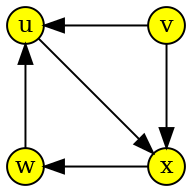

In [14]:
DSTG.crtaj_graphviz(digraf1,'digraf1.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy={"u":[0,1],"v":[1,1],"w":[0,0],"x":[1,0]})

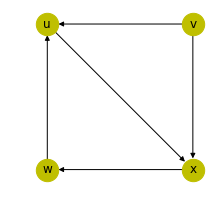

In [15]:
figure(figsize=(2.5,2.5))
nx.draw(digraf1,pos={"u":[0,1],"v":[1,1],"w":[0,0],"x":[1,0]},with_labels=True,node_color='y',node_size=500)

<strong>Outstupanj vrha v</strong>

In [16]:
digraf1.out_degree('v')

2

<strong>Instupanj vrha v</strong>

In [17]:
digraf1.in_degree('v')

0

<strong>outstupnjevi svih vrhova</strong>

In [18]:
digraf1.out_degree()

OutDegreeView({'u': 1, 'x': 1, 'v': 2, 'w': 1})

<strong>instupnjevi svih vrhova</strong>

In [19]:
digraf1.in_degree()

InDegreeView({'u': 2, 'x': 2, 'v': 0, 'w': 1})

<strong>outstupnjevi vrhova u i v</strong>

In [20]:
digraf1.out_degree(['u','v'])

OutDegreeView({'u': 1, 'v': 2})

<strong>instupnjevi vrhova u i v</strong>

In [21]:
digraf1.in_degree(['u','v'])

InDegreeView({'u': 2, 'v': 0})

<strong>možemo tražiti stupnjeve vrhova u pripadnom grafu</strong>

In [22]:
digraf1.degree()

DiDegreeView({'u': 3, 'x': 3, 'v': 2, 'w': 2})

<strong>matrica susjedstva</strong>
<p>vrhovi se smještaju u matricu susjedstva onim redom kojim su u listi <font color="red">digraf1.nodes()</font></p>

In [23]:
digraf1.nodes()

NodeView(('u', 'x', 'v', 'w'))

In [24]:
nx.adj_matrix(digraf1).todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 1, 0, 0],
        [1, 0, 0, 0]], dtype=int64)

In [25]:
nx.to_pandas_adjacency(digraf1,dtype=int)

u  x  v  w
u  0  1  0  0
x  0  0  0  1
v  1  1  0  0
w  1  0  0  0

<strong>lukovi prema vrhu x</strong>

In [26]:
digraf1.in_edges('x')

InEdgeDataView([('u', 'x'), ('v', 'x')])

<strong>lukovi iz vrha x</strong>

In [27]:
digraf1.out_edges('x')

OutEdgeDataView([('x', 'w')])

<strong>vrhovi prema kojima postoji luk iz vrha x (out-susjedi vrha x)</strong>

In [28]:
list(digraf1.neighbors('x'))

['w']

In [29]:
list(digraf1.successors('x'))

['w']

<strong>vrhovi iz kojih postoji luk prema vrhu x (in-susjedi vrha x)</strong>

In [30]:
list(digraf1.predecessors('x'))

['u', 'v']

<strong>da li je digraf povezan</strong>

In [31]:
nx.is_connected(digraf1.to_undirected())

True

<strong>komponente povezanosti - ima samo jednu komponentu jer je digraf povezan</strong>

In [32]:
list(nx.connected_components(digraf1.to_undirected()))

[{'u', 'v', 'w', 'x'}]

<strong>da li je digraf dipovezan (jako povezan)</strong>

In [33]:
nx.is_strongly_connected(digraf1)

False

<strong>dikomponente - digraf1 ima dvije dikomponente</strong>

In [34]:
list(nx.strongly_connected_components(digraf1))

[{'u', 'w', 'x'}, {'v'}]

<strong>dikomponente kao inducirani podgrafovi</strong>

In [35]:
dikomponente=list(nx.strongly_connected_component_subgraphs(digraf1))
dikomponente

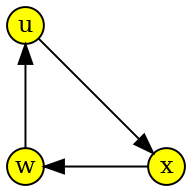

In [36]:
DSTG.crtaj_graphviz(dikomponente[0],'dikomp1.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy={"u":[0,1],"w":[0,0],"x":[1,0]})

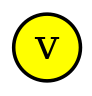

In [37]:
DSTG.crtaj_graphviz(dikomponente[1],'dikomp2.png',slika=(1,1),bojaVrha='yellow',tezine=False)

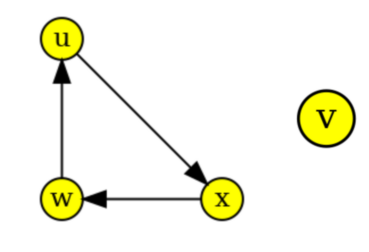

In [38]:
gs1=gridspec.GridSpec(1, 2,width_ratios=[3,1])
subplot(gs1[0])
axis('off')
imshow(imread('dikomp1.png'),aspect='equal',interpolation='bicubic')
subplot(gs1[1])
axis('off')
imshow(imread('dikomp2.png'),interpolation='bicubic');

<strong>da li digraf nema usmjerenih ciklusa</strong>

In [39]:
nx.is_directed_acyclic_graph(digraf1)

False

<strong>najkraći usmjereni put od vrha $v$ prema vrhu $u$ i njegova duljina</strong>

In [40]:
nx.shortest_path(digraf1,'v','u')

['v', 'u']

In [41]:
nx.shortest_path_length(digraf1,'v','u')

1

<strong>najkraći usmjereni putovi od vrha $u$ prema svim preostalim vrhovima i njihove udaljenosti</strong>

In [42]:
nx.shortest_path(digraf1,'u')

{'u': ['u'], 'x': ['u', 'x'], 'w': ['u', 'x', 'w']}

In [43]:
nx.shortest_path_length(digraf1,'u')

{'u': 0, 'x': 1, 'w': 2}

### digraf2

In [44]:
digraf2=nx.DiGraph([('u','v'),('v','u'),('v','x'),('w','u'),('w','x')])

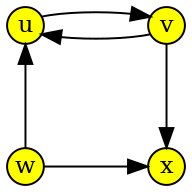

In [45]:
DSTG.crtaj_graphviz(digraf2,'digraf2.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy={"u":[0,1],"v":[1,1],"w":[0,0],"x":[1,0]})

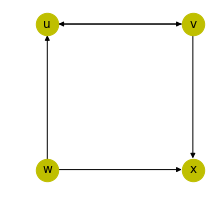

In [46]:
figure(figsize=(2.5,2.5))
nx.draw(digraf2,pos={"u":[0,1],"v":[1,1],"w":[0,0],"x":[1,0]},with_labels=True,node_color='y',node_size=500)

<strong>matrica susjedstva</strong>

In [47]:
digraf2.nodes()

NodeView(('u', 'v', 'x', 'w'))

In [48]:
nx.adj_matrix(digraf2).todense()

matrix([[0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 0, 0, 0],
        [1, 0, 1, 0]], dtype=int64)

In [49]:
nx.to_pandas_adjacency(digraf2,dtype=int)

u  v  x  w
u  0  1  0  0
v  1  0  1  0
x  0  0  0  0
w  1  0  1  0

<strong>digraf nije dipovezan</strong>

In [50]:
nx.is_strongly_connected(digraf2)

False

<strong>digraf ima tri dikomponente</strong>

In [51]:
list(nx.strongly_connected_components(digraf2))

[{'x'}, {'u', 'v'}, {'w'}]

<strong>dikomponente kao inducirani podgrafovi</strong>

In [52]:
dikomponente2=list(nx.strongly_connected_component_subgraphs(digraf2))
dikomponente2

In [53]:
dikomponente2[0].nodes(),dikomponente2[1].nodes(),dikomponente2[2].nodes()

(NodeView(('x',)), NodeView(('u', 'v')), NodeView(('w',)))

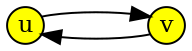

In [54]:
DSTG.crtaj_graphviz(dikomponente2[1],'dikomp3.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy={"u":[0,1],"v":[1,1]})

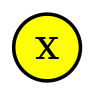

In [55]:
DSTG.crtaj_graphviz(dikomponente2[0],'dikomp4.png',slika=(1,1),bojaVrha='yellow',tezine=False)

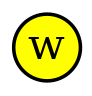

In [56]:
DSTG.crtaj_graphviz(dikomponente2[2],'dikomp5.png',slika=(1,1),bojaVrha='yellow',tezine=False)

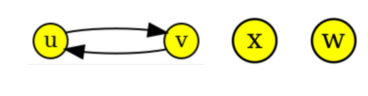

In [57]:
gs2=gridspec.GridSpec(1, 3, width_ratios=[3,1,1])
subplot(gs2[0])
axis('off')
imshow(imread('dikomp3.png'),interpolation='bicubic')
subplot(gs2[1])
axis('off')
imshow(imread('dikomp4.png'),interpolation='bicubic')
subplot(gs2[2])
axis('off')
imshow(imread('dikomp5.png'),interpolation='bicubic');

<strong>digraf2 sadrži usmjerene cikluse</strong>

In [58]:
nx.is_directed_acyclic_graph(digraf2)

False

### digraf3

In [59]:
digraf3=nx.MultiDiGraph([('u','v'),('u','v'),('v','x'),('w','u'),('w','x')])

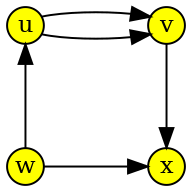

In [60]:
DSTG.crtaj_graphviz(digraf3,'digraf3.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy={"u":[0,1],"v":[1,1],"w":[0,0],"x":[1,0]})

<strong>matrica susjedstva</strong>

In [61]:
digraf3.nodes()

NodeView(('u', 'v', 'x', 'w'))

In [62]:
nx.adj_matrix(digraf3).todense()

matrix([[0, 2, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0],
        [1, 0, 1, 0]], dtype=int64)

In [63]:
nx.to_pandas_adjacency(digraf3,dtype=int)

u  v  x  w
u  0  2  0  0
v  0  0  1  0
x  0  0  0  0
w  1  0  1  0

<strong>digraf nije dipovezan</strong>

In [64]:
nx.is_strongly_connected(digraf3)

False

<strong>digraf ima četiri dikomponente</strong>

In [65]:
list(nx.strongly_connected_components(digraf3))

[{'x'}, {'v'}, {'u'}, {'w'}]

<strong>digraf ne sadrži usmjerene cikluse</strong>

In [66]:
nx.is_directed_acyclic_graph(digraf3)

True

### digraf4

In [67]:
digraf4=nx.DiGraph([('u1','u3'),('u2','u1'),('u3','u2'),('u4','u1'),('u4','u3')])

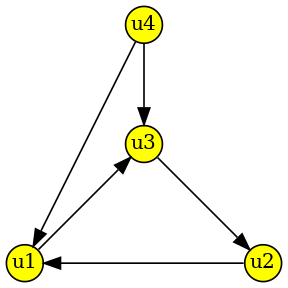

In [68]:
DSTG.crtaj_graphviz(digraf4,'digraf4.png',slika=(3,3),bojaVrha='yellow',tezine=False,xy={"u1":[0,0],"u2":[2,0],"u3":[1,1],"u4":[1,2]})

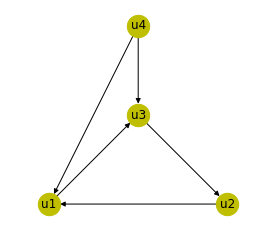

In [69]:
figure(figsize=(3,3))
nx.draw(digraf4,pos={"u1":[0,0],"u2":[2,0],"u3":[1,1],"u4":[1,2]},with_labels=True,node_color='y',node_size=500)

<strong>matrica susjedstva</strong>

In [70]:
digraf4.nodes()

NodeView(('u1', 'u3', 'u2', 'u4'))

In [71]:
mat4=nx.adj_matrix(digraf4).todense();mat4

matrix([[0, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 1, 0, 0]], dtype=int64)

In [72]:
nx.to_pandas_adjacency(digraf4,dtype=int)

u1  u3  u2  u4
u1   0   1   0   0
u3   0   0   1   0
u2   1   0   0   0
u4   1   1   0   0

<strong>ukupni broj usmjerenih $(u_1,u_2)$-šetnji duljine 2</strong>

In [73]:
mat4**2

matrix([[0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 1, 0]], dtype=int64)

In [74]:
(mat4**2)[0,2]

1

<strong>ukupni broj usmjerenih $(u_2,u_1)$-šetnji duljine 2</strong>

In [75]:
(mat4**2)[2,0]

0

<strong>ukupni broj usmjerenih $(u_4,u_3)$-šetnji duljine 5</strong>

In [76]:
(mat4**5)[3,1]

1

### digraf5

In [77]:
digraf5=nx.DiGraph([('v1','v2'),('v1','v4'),('v2','v4'),('v3','v2'),('v4','v3')])

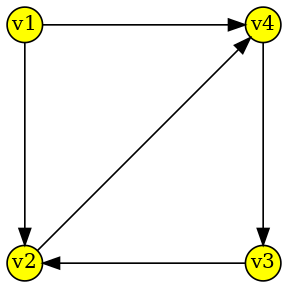

In [78]:
DSTG.crtaj_graphviz(digraf5,'digraf5.png',slika=(3,3),bojaVrha='yellow',tezine=False,xy={"v1":[0,2],"v2":[0,0],"v3":[2,0],"v4":[2,2]})

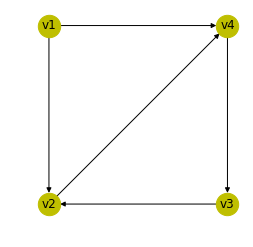

In [79]:
figure(figsize=(3,3))
nx.draw(digraf5,pos={"v1":[0,2],"v2":[0,0],"v3":[2,0],"v4":[2,2]},with_labels=True,node_color='y',node_size=500)

<strong>digraf4 i digraf5</strong>

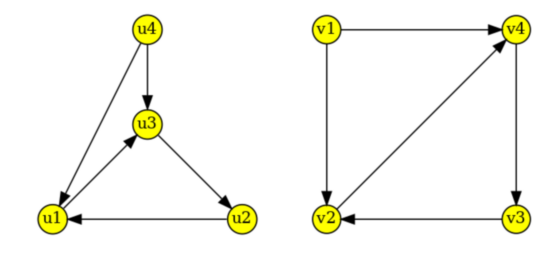

In [80]:
figure(figsize=(9,7))
gs3=gridspec.GridSpec(1, 2)
subplot(gs3[0])
axis('off')
imshow(imread('digraf4.png'),interpolation='bicubic')
subplot(gs3[1])
axis('off')
imshow(imread('digraf5.png'),interpolation='bicubic');

<strong>digraf4 i digraf5 su izomorfni digrafovi</strong>

In [81]:
DM=nx.isomorphism.DiGraphMatcher(digraf4,digraf5)

In [82]:
DM.is_isomorphic()

True

<strong>izomorfizam: $u_1\leftrightarrow v_2,\ \ u_2\leftrightarrow v_3,\ \ u_3\leftrightarrow v_4,\ \ u_4\leftrightarrow v_1$</strong>

In [83]:
DM.mapping

{'u4': 'v1', 'u1': 'v2', 'u3': 'v4', 'u2': 'v3'}

<strong>postoji samo jedan izomorfizam između digrafova digraf4 i digraf5</strong>

In [84]:
for u in DM.isomorphisms_iter():
    print(u) 

{'u4': 'v1', 'u1': 'v2', 'u3': 'v4', 'u2': 'v3'}


## Turnir

In [85]:
turnir=nx.DiGraph([('a','c'),('a','d'),('b','a'),('b','c'),('b','e'),('c','f'),('d','b'),('d','c'),
                   ('e','a'),('e','c'),('e','d'),('e','f'),('f','a'),('f','b'),('f','d')])
turpoz={'a':[2,0],'b':[4,0],'c':[6,2],'d':[4,4],'e':[2,4],'f':[0,2]}

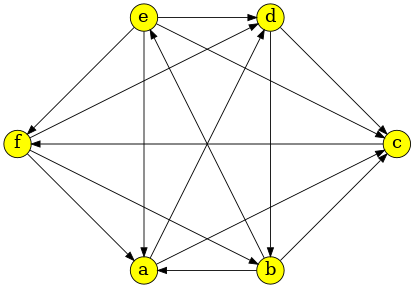

In [86]:
DSTG.crtaj_graphviz(turnir,'turnir.png',slika=(5,3),bojaVrha='yellow',tezine=False,xy=turpoz,fontV=20)

<strong>vektor uspjeha turnira</strong>

In [87]:
turnir.out_degree()

OutDegreeView({'a': 2, 'c': 1, 'd': 2, 'b': 3, 'e': 4, 'f': 3})

In [88]:
list(dict(turnir.out_degree()).values())

[2, 1, 2, 3, 4, 3]

<strong>najkraći usmjereni put od vrha a do vrha d</strong>

In [89]:
nx.shortest_path(turnir,'a','d')

['a', 'd']

<strong>najkraći usmjereni put od vrha a do vrha e</strong>

In [90]:
nx.shortest_path(turnir,'a','e')

['a', 'd', 'b', 'e']

<strong>najkraći put istaknut na digrafu</strong>

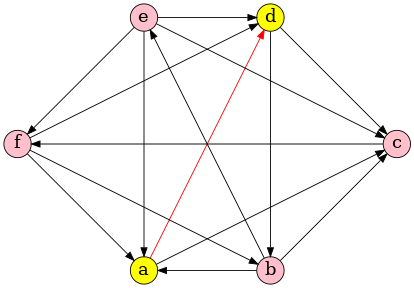

In [91]:
DSTG.graphviz_najkraci_put(turnir,'a','d',"turnir_ad.png",slika=(5,3),xy=turpoz,tezine=False,fontV=20)

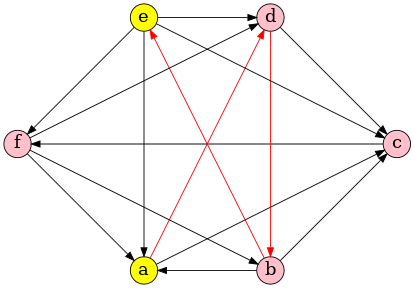

In [92]:
DSTG.graphviz_najkraci_put(turnir,'a','e',"turnir_ae.png",slika=(5,3),xy=turpoz,tezine=False,fontV=20)

## Brentov algoritam

Za traženje usmjerenih ciklusa u bilo kojem digrafu, implementiran je Brentov algoritam. Taj algoritam za zadani digraf daje neki, na slučajni način pronađeni, usmjereni ciklus.

<strong>nekoliko usmjerenih ciklusa u našem promatranom turniru</strong>

In [93]:
for i in range(5):
    print(DSTG.usmjereni_ciklus(turnir))

['c', 'f', 'd', 'c']
['d', 'b', 'c', 'f', 'd']
['f', 'b', 'a', 'c', 'f']
['a', 'c', 'f', 'b', 'a']
['f', 'b', 'c', 'f']


<strong>nekoliko usmjerenih ciklusa istaknutih na digrafu</strong>

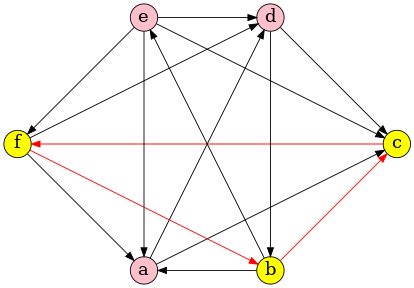

In [94]:
DSTG.graphviz_usmjereni_ciklus(turnir,"ciklus1.png",slika=(5,3),xy=turpoz,tezine=False,fontV=20)

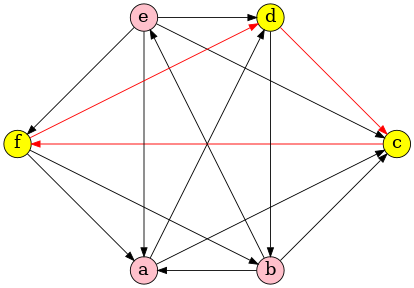

In [95]:
DSTG.graphviz_usmjereni_ciklus(turnir,"ciklus2.png",slika=(5,3),xy=turpoz,tezine=False,fontV=20)

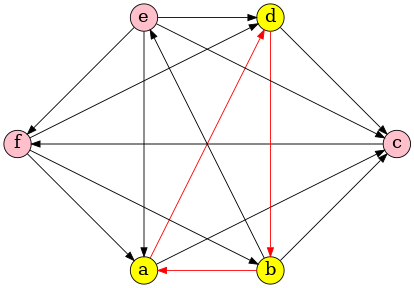

In [96]:
DSTG.graphviz_usmjereni_ciklus(turnir,"ciklus3.png",slika=(5,3),xy=turpoz,tezine=False,fontV=20)

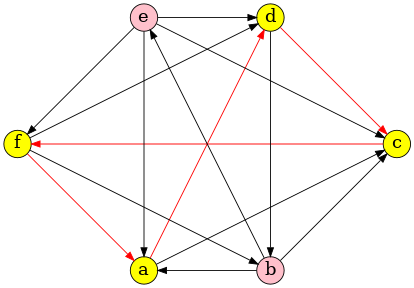

In [97]:
DSTG.graphviz_usmjereni_ciklus(turnir,"ciklus4.png",slika=(5,3),xy=turpoz,tezine=False,fontV=20)

<strong>promatrani turnir nije Eulerov digraf</strong>

In [98]:
nx.is_eulerian(turnir)

False

## Dva turnira s tri vrha

In [99]:
trokut1=nx.DiGraph([("a","b"),("b","c"),("c","a")])
trokut2=nx.DiGraph([("a","b"),("a","c"),("b","c")])
trokutpoz={"a":[0,0],"b":[2,0],"c":[1,1.5]}

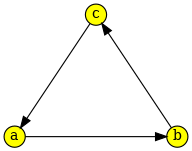

In [100]:
DSTG.crtaj_graphviz(trokut1,'trokut1.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy=trokutpoz)

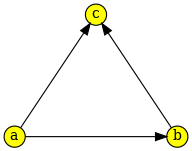

In [101]:
DSTG.crtaj_graphviz(trokut2,'trokut2.png',slika=(2,2),bojaVrha='yellow',tezine=False,xy=trokutpoz)

<strong>trokut1 je Eulerov digraf, a trokut2 nije Eulerov digraf</strong>

In [102]:
nx.is_eulerian(trokut1)

True

In [103]:
nx.is_eulerian(trokut2)

False

## Rangiranje

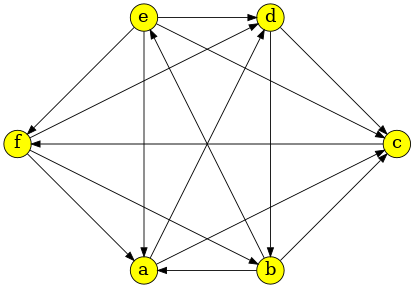

In [104]:
Image(filename="turnir.png")

In [105]:
DSTG.rang_lista(turnir)

In [106]:
DSTG.rang_lista(turnir,izlaz='lista')

[['e', 4, 12],
 ['b', 3, 10],
 ['f', 3, 10],
 ['d', 2, 6],
 ['a', 2, 5],
 ['c', 1, 4]]

<strong>rang lista za turnir2</strong>

In [107]:
turnir2=nx.DiGraph([("A","B"),("A","C"),("A","D"),("B","D"),
                    ("B","E"),("C","B"),("C","D"),("E","A"),("E","C"),("E","D")])

In [108]:
T2=nx.nx_agraph.to_agraph(turnir2)
T2.node_attr['shape']='circle'
T2.node_attr['style']='filled'
T2.node_attr['fillcolor']='yellow'
T2.draw('turnir2.png',prog='circo')

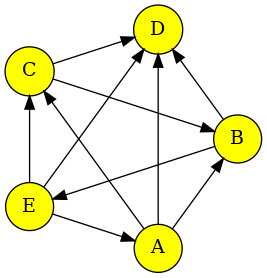

In [109]:
Image(filename="turnir2.png")

In [110]:
DSTG.rang_lista(turnir2)

In [111]:
DSTG.rang_lista(turnir2,izlaz='lista')

[['E', 3, 8], ['A', 3, 7], ['B', 2, 5], ['C', 2, 4], ['D', 0, 0]]

<strong>rang lista za turnir3</strong>

In [112]:
turnir3=nx.DiGraph([("A","C"),("A","D"),("B","A"),("B","C"),("B","E"),
                    ("C","D"),("D","B"),("E","A"),("E","C"),("E","D")])

In [113]:
T3=nx.nx_agraph.to_agraph(turnir3)
T3.node_attr['shape']='circle'
T3.node_attr['style']='filled'
T3.node_attr['fillcolor']='yellow'
T3.draw('turnir3.png',prog='circo')

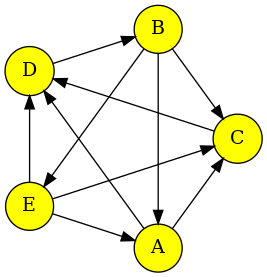

In [114]:
Image(filename="turnir3.png")

In [115]:
DSTG.rang_lista(turnir3)

## Bellman-Fordov i Dijkstrin algoritam

<strong>digraf6</strong> - Bellman-Ford i Dijkstra dobro rade

In [116]:
digraf6=nx.DiGraph([('v1','v2',{'weight':1}),('v1','v5',{'weight':4}),
                    ('v2','v3',{'weight':1}),('v2','v5',{'weight':3}),
                    ('v3','v4',{'weight':5}),('v3','v5',{'weight':1}),
                    ('v4','v3',{'weight':1}),('v5','v3',{'weight':1}),
                    ('v5','v4',{'weight':1})])

In [117]:
D6pos={'v1':[0,2],'v2':[2,4],'v3':[5,4],'v4':[6,0],'v5':[2,0]}

<h4>funkcije koje vraća najkraće udaljenosti i putove iz zadanog vrha prema preostalim vrhovima</h4>

In [118]:
nx.single_source_bellman_ford(digraf6,'v1')

({'v1': 0, 'v2': 1, 'v5': 3, 'v3': 2, 'v4': 4},
 {'v1': ['v1'],
  'v2': ['v1', 'v2'],
  'v5': ['v1', 'v2', 'v3', 'v5'],
  'v3': ['v1', 'v2', 'v3'],
  'v4': ['v1', 'v2', 'v3', 'v5', 'v4']})

In [119]:
nx.single_source_bellman_ford_path(digraf6,'v1')

{'v1': ['v1'],
 'v2': ['v1', 'v2'],
 'v5': ['v1', 'v2', 'v3', 'v5'],
 'v3': ['v1', 'v2', 'v3'],
 'v4': ['v1', 'v2', 'v3', 'v5', 'v4']}

In [120]:
nx.single_source_bellman_ford_path_length(digraf6,'v1')

{'v1': 0, 'v2': 1, 'v5': 3, 'v3': 2, 'v4': 4}

In [121]:
list(nx.all_pairs_bellman_ford_path(digraf6))

[('v1',
  {'v1': ['v1'],
   'v2': ['v1', 'v2'],
   'v5': ['v1', 'v2', 'v3', 'v5'],
   'v3': ['v1', 'v2', 'v3'],
   'v4': ['v1', 'v2', 'v3', 'v5', 'v4']}),
 ('v2',
  {'v2': ['v2'],
   'v3': ['v2', 'v3'],
   'v5': ['v2', 'v3', 'v5'],
   'v4': ['v2', 'v3', 'v5', 'v4']}),
 ('v5', {'v5': ['v5'], 'v3': ['v5', 'v3'], 'v4': ['v5', 'v4']}),
 ('v3', {'v3': ['v3'], 'v4': ['v3', 'v5', 'v4'], 'v5': ['v3', 'v5']}),
 ('v4', {'v4': ['v4'], 'v3': ['v4', 'v3'], 'v5': ['v4', 'v3', 'v5']})]

In [122]:
list(nx.all_pairs_bellman_ford_path_length(digraf6))

[('v1', {'v1': 0, 'v2': 1, 'v5': 3, 'v3': 2, 'v4': 4}),
 ('v2', {'v2': 0, 'v3': 1, 'v5': 2, 'v4': 3}),
 ('v5', {'v5': 0, 'v3': 1, 'v4': 1}),
 ('v3', {'v3': 0, 'v4': 2, 'v5': 1}),
 ('v4', {'v4': 0, 'v3': 1, 'v5': 2})]

In [123]:
nx.bellman_ford_predecessor_and_distance(digraf6,'v1')

({'v1': [], 'v2': ['v1'], 'v5': ['v3'], 'v3': ['v2'], 'v4': ['v5']},
 {'v1': 0, 'v2': 1, 'v5': 3, 'v3': 2, 'v4': 4})

<h4>najkraći put od vrha $v_1$ do vrha $v_4$</h4>

In [124]:
nx.bellman_ford_path(digraf6,'v1','v4')

['v1', 'v2', 'v3', 'v5', 'v4']

In [125]:
nx.bellman_ford_path_length(digraf6,'v1','v4')

4

<h4>u promatranom digrafu ne postoji usmjereni ciklus negativne težine</h4>

In [126]:
nx.negative_edge_cycle(digraf6)

False

<h4>Ručni algoritam</h4>

In [127]:
DSTG.rucni_BellmanFord(digraf6,'v1',poredak=['v1','v2','v3','v4','v5'])

In [128]:
DSTG.BellmanFord(digraf6,'v1')

({'v1': 0, 'v2': 1, 'v5': 3, 'v3': 2, 'v4': 4},
 {'v1': None, 'v2': 'v1', 'v5': 'v3', 'v3': 'v2', 'v4': 'v5'})

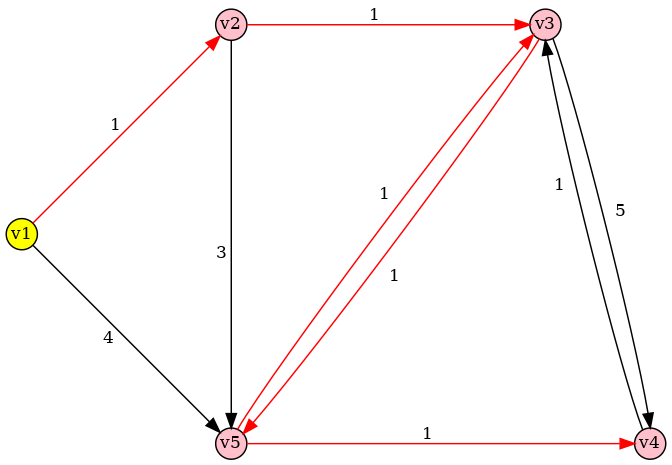

In [129]:
DSTG.graphviz_stablo_min_putova(digraf6,'v1',"D6.png",algoritam=DSTG.BellmanFord,slika=(7,6),
                    xy=D6pos,vrh0="yellow",vrh1="pink",brid0="red",brid1="black",
                    bojaTezine="black",d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):12},
                    kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

In [130]:
DSTG.rucni_Dijkstra_digraf(digraf6,'v1',poredak=['v1','v2','v3','v4','v5'])

In [131]:
DSTG.Dijkstra_digraf(digraf6,'v1')

({'v3': 2, 'v1': 0, 'v2': 1, 'v4': 4, 'v5': 3},
 {'v3': 'v2', 'v1': None, 'v2': 'v1', 'v4': 'v5', 'v5': 'v3'})

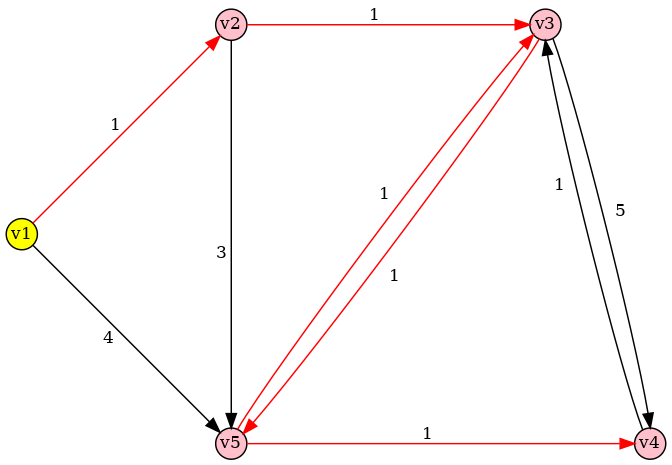

In [132]:
DSTG.graphviz_stablo_min_putova(digraf6,'v1',"D6dva.png",algoritam=DSTG.Dijkstra_digraf,slika=(7,6),
                xy=D6pos,vrh0="yellow",vrh1="pink",brid0="red",brid1="black",
                bojaTezine="black",d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):12},
                kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

<strong>pogledajmo još iz vrha $v_4$ kao početnog vrha</strong>

In [133]:
DSTG.rucni_BellmanFord(digraf6,'v4',poredak=['v1','v2','v3','v4','v5'])

In [134]:
DSTG.BellmanFord(digraf6,'v4')

({'v1': inf, 'v2': inf, 'v5': 2, 'v3': 1, 'v4': 0},
 {'v1': None, 'v2': None, 'v5': 'v3', 'v3': 'v4', 'v4': None})

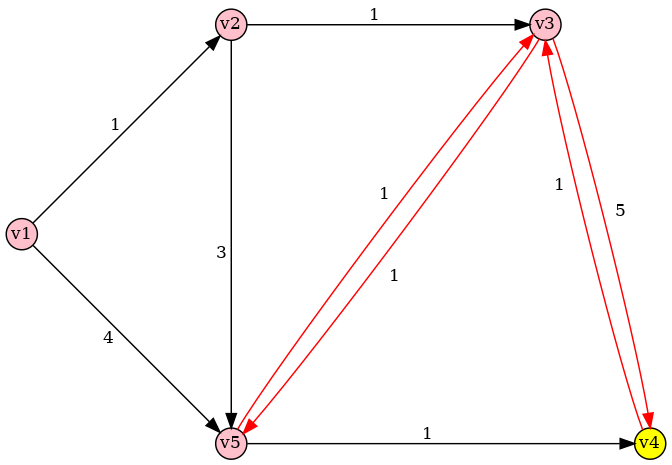

In [135]:
DSTG.graphviz_stablo_min_putova(digraf6,'v4',"D6tri.png",algoritam=DSTG.BellmanFord,slika=(7,6),
                xy=D6pos,vrh0="yellow",vrh1="pink",brid0="red",brid1="black",
                bojaTezine="black",d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):12},
                kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

In [136]:
DSTG.rucni_Dijkstra_digraf(digraf6,'v4',poredak=['v1','v2','v3','v4','v5'])

In [137]:
DSTG.Dijkstra_digraf(digraf6,'v4')

({'v3': 1, 'v1': inf, 'v2': inf, 'v4': 0, 'v5': 2},
 {'v3': 'v4', 'v1': None, 'v2': None, 'v4': None, 'v5': 'v3'})

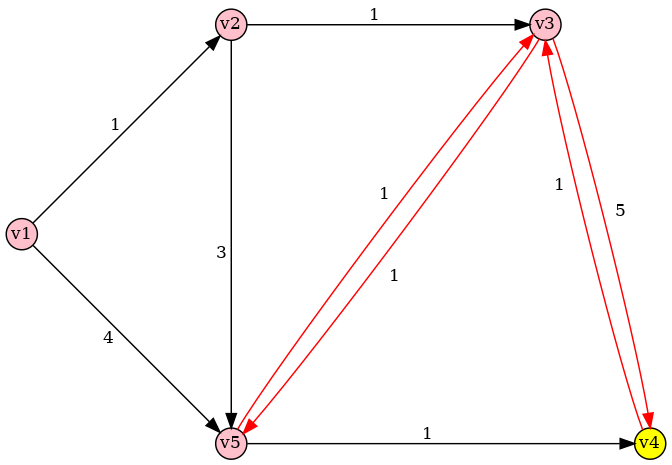

In [138]:
DSTG.graphviz_stablo_min_putova(digraf6,'v4',"D6cetiri.png",algoritam=DSTG.Dijkstra_digraf,slika=(7,6),
                xy=D6pos,vrh0="yellow",vrh1="pink",brid0="red",brid1="black",
                bojaTezine="black",d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):12},
                kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

<strong>digraf7</strong> - zbog negativnih težina Dijkstra ne radi dobro; a kako nema negativnih ciklusa, Bellman-Ford radi ispravno

In [139]:
digraf7=nx.DiGraph([('v1','v2',{'weight':1}),('v1','v5',{'weight':4}),
                    ('v2','v3',{'weight':2}),('v2','v5',{'weight':3}),
                    ('v3','v4',{'weight':5}),('v3','v5',{'weight':4}),
                    ('v4','v3',{'weight':-1}),('v5','v3',{'weight':1}),
                    ('v5','v4',{'weight':-1})])

In [140]:
DSTG.rucni_BellmanFord(digraf7,'v1',poredak=['v1','v2','v3','v4','v5'])

In [141]:
DSTG.BellmanFord(digraf7,'v1')

({'v1': 0, 'v2': 1, 'v5': 4, 'v3': 2, 'v4': 3},
 {'v1': None, 'v2': 'v1', 'v5': 'v1', 'v3': 'v4', 'v4': 'v5'})

In [142]:
nx.negative_edge_cycle(digraf7)

False

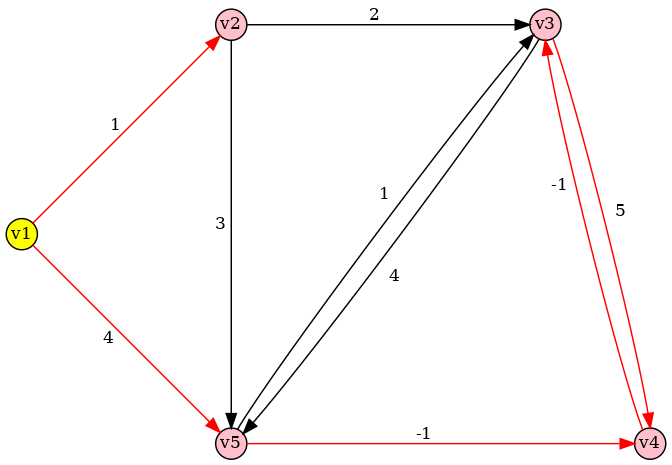

In [143]:
DSTG.graphviz_stablo_min_putova(digraf7,'v1',"D7.png",algoritam=DSTG.BellmanFord,slika=(7,6),xy=D6pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):14},
                               kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

In [144]:
DSTG.rucni_Dijkstra_digraf(digraf7,'v1',poredak=['v1','v2','v3','v4','v5'])

error: Dijkstra ne radi ispravno na negativnim tezinama


In [145]:
DSTG.Dijkstra_digraf(digraf7,'v1') 

error: Dijkstra ne radi ispravno na negativnim tezinama


({'v3': 3, 'v1': 0, 'v2': 1, 'v4': 3, 'v5': 4},
 {'v3': 'v2', 'v1': None, 'v2': 'v1', 'v4': 'v5', 'v5': 'v1'})

error: Dijkstra ne radi ispravno na negativnim tezinama


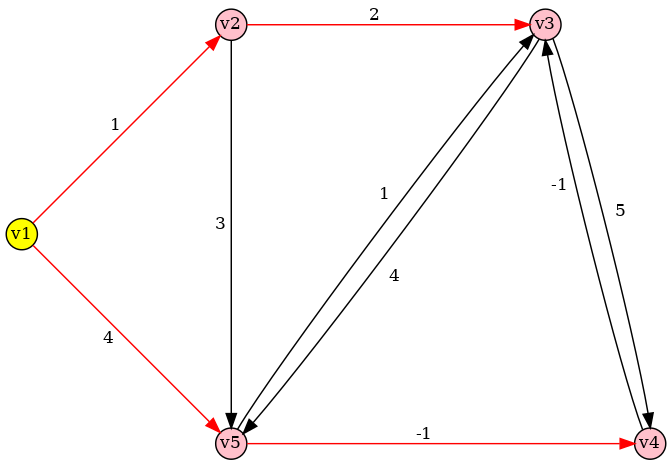

In [146]:
DSTG.graphviz_stablo_min_putova(digraf7,'v1',"D7dva.png",algoritam=DSTG.Dijkstra_digraf,slika=(7,6),xy=D6pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):14},
                               kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

<strong>digraf8</strong> - ima usmjereni ciklus negativne težine. Stoga, niti Bellman-Ford, niti Dijkstra ne rade dobro na ovom digrafu.

In [147]:
digraf8=nx.DiGraph([('v1','v2',{'weight':1}),('v1','v5',{'weight':4}),
                    ('v2','v3',{'weight':2}),('v2','v5',{'weight':3}),
                    ('v3','v4',{'weight':5}),('v3','v5',{'weight':1}),
                    ('v4','v3',{'weight':-1}),('v5','v3',{'weight':1}),
                    ('v5','v4',{'weight':-1})])

In [148]:
DSTG.rucni_BellmanFord(digraf8,'v1',poredak=['v1','v2','v3','v4','v5'])

error: digraf ima negativne cikluse


In [149]:
DSTG.BellmanFord(digraf8,'v1')

error: digraf ima negativne cikluse


({'v1': 0, 'v2': 1, 'v5': 3, 'v3': 2, 'v4': 2},
 {'v1': None, 'v2': 'v1', 'v5': 'v3', 'v3': 'v4', 'v4': 'v5'})

In [150]:
nx.negative_edge_cycle(digraf8)

True

error: digraf ima negativne cikluse


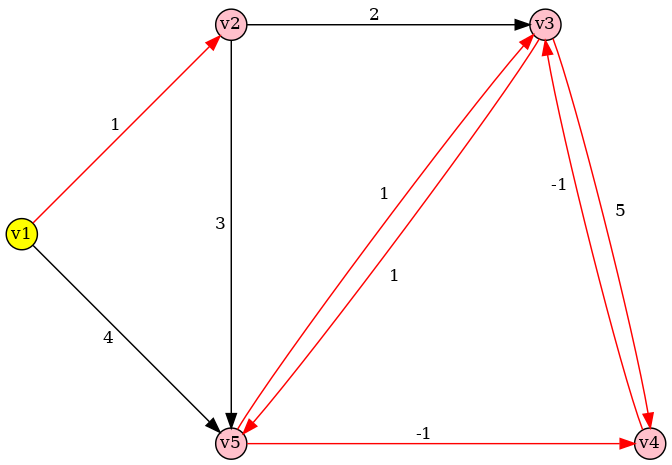

In [151]:
DSTG.graphviz_stablo_min_putova(digraf8,'v1',"D8.png",algoritam=DSTG.BellmanFord,slika=(7,6),xy=D6pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):14},
                               kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

In [152]:
DSTG.rucni_Dijkstra_digraf(digraf8,'v1',poredak=['v1','v2','v3','v4','v5'])

error: Dijkstra ne radi ispravno na negativnim tezinama


In [153]:
DSTG.Dijkstra_digraf(digraf8,'v1')

error: Dijkstra ne radi ispravno na negativnim tezinama


({'v3': 3, 'v1': 0, 'v2': 1, 'v4': 3, 'v5': 4},
 {'v3': 'v2', 'v1': None, 'v2': 'v1', 'v4': 'v5', 'v5': 'v1'})

error: Dijkstra ne radi ispravno na negativnim tezinama


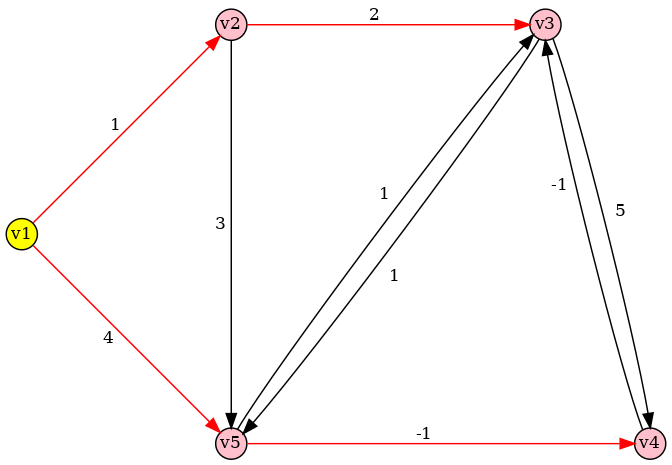

In [154]:
DSTG.graphviz_stablo_min_putova(digraf8,'v1',"D8dva.png",algoritam=DSTG.Dijkstra_digraf,slika=(7,6),xy=D6pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               d={('v4','v3'):10,('v3','v4'):15,('v5','v3'):15,('v3','v5'):15,('v1','v5'):10,('v2','v5'):14},
                               kut={('v4','v3'):-3,('v3','v4'):-1,('v5','v3'):-1,('v3','v5'):-2,('v1','v5'):5,('v2','v5'):3})

<p style="line-height:25px;"><strong>digraf9</strong> - digraf sadrži usmjereni ciklus negativne težine koji se dvaput obišao u toku izvođenja Bellman-Fordovog algoritma i naravno dobivamo krive rezultate. U ovom slučaju Dijkstra radi ispravno, ali to je samo splet okolnosti zbog same strukture digrafa koja ovdje dobro odgovara Dijkstrinom algoritmu iz vrha $v_1$ (općenito ne možemo garantirati točnost rezultata).</p>

In [155]:
digraf9=nx.DiGraph([('v1','v2',{'weight':3}),('v2','v3',{'weight':-2}),
                    ('v3','v4',{'weight':1}),('v4','v2',{'weight':-1}),
                    ('v4','v5',{'weight':1}),('v5','v6',{'weight':1}),
                    ('v6','v7',{'weight':1}),('v7','v8',{'weight':1})])

In [156]:
D9pos={'v1':[0,0.5],'v2':[2,0.4],'v3':[4,1],'v4':[6,0.4],
       'v5':[8,0.4],'v6':[10,0.3],'v7':[12,1],'v8':[8,2]} 

In [157]:
nx.negative_edge_cycle(digraf9)

True

In [158]:
DSTG.rucni_BellmanFord(digraf9,'v1')

error: digraf ima negativne cikluse


In [159]:
DSTG.BellmanFord(digraf9,'v1')

error: digraf ima negativne cikluse


({'v1': 0, 'v2': -1, 'v3': -3, 'v4': 0, 'v5': 1, 'v6': 2, 'v7': 5, 'v8': 6},
 {'v1': None,
  'v2': 'v4',
  'v3': 'v2',
  'v4': 'v3',
  'v5': 'v4',
  'v6': 'v5',
  'v7': 'v6',
  'v8': 'v7'})

error: digraf ima negativne cikluse


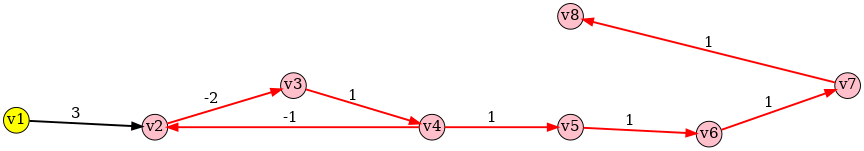

In [160]:
DSTG.graphviz_stablo_min_putova(digraf9,'v1',"D9.png",algoritam=DSTG.BellmanFord,slika=(9,8),xy=D9pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               fontV=16,debljinaE=2,fontE=16)

In [161]:
DSTG.rucni_Dijkstra_digraf(digraf9,'v1')

error: Dijkstra ne radi ispravno na negativnim tezinama


In [162]:
DSTG.Dijkstra_digraf(digraf9,'v1')

error: Dijkstra ne radi ispravno na negativnim tezinama


({'v3': 1, 'v1': 0, 'v2': 3, 'v8': 6, 'v7': 5, 'v6': 4, 'v4': 2, 'v5': 3},
 {'v3': 'v2',
  'v1': None,
  'v2': 'v1',
  'v8': 'v7',
  'v7': 'v6',
  'v6': 'v5',
  'v4': 'v3',
  'v5': 'v4'})

error: Dijkstra ne radi ispravno na negativnim tezinama


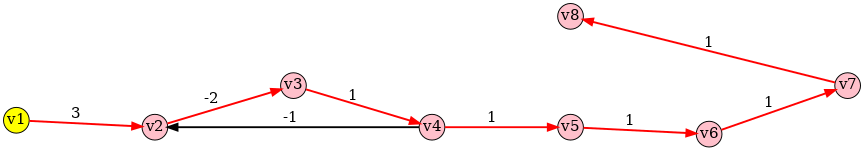

In [163]:
DSTG.graphviz_stablo_min_putova(digraf9,'v1',"D9dva.png",algoritam=DSTG.Dijkstra_digraf,slika=(9,8),xy=D9pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               fontV=16,debljinaE=2,fontE=16)

<p style="line-height:25px;"><strong>digraf10</strong> - iako ima usmjereni ciklus negativne težine, Bellman-Ford radi ispravno iz vrha $v_1$ kao početnog vrha, zato jer se taj negativni ciklus ne može doseći iz vrha $v_1$ pa su rezultati točni i možemo garantirati njihovu točnost. Dijkstra također radi ispravno iz vrha $v_1$, ali općenito ne možemo garantirati njegovu točnost.</p>

In [164]:
digraf10=nx.DiGraph([('v1','v4',{'weight':1}),('v2','v1',{'weight':1}),
                    ('v2','v3',{'weight':1}),('v3','v2',{'weight':-2}),
                    ('v3','v4',{'weight':1})])

In [165]:
D10pos={'v1':[0,2],'v2':[4,3],'v3':[7,3.5],'v4':[1,0]}

In [166]:
nx.negative_edge_cycle(digraf10)

True

In [167]:
DSTG.rucni_BellmanFord(digraf10,'v1')

In [168]:
DSTG.BellmanFord(digraf10,'v1')

({'v1': 0, 'v4': 1, 'v2': inf, 'v3': inf},
 {'v1': None, 'v4': 'v1', 'v2': None, 'v3': None})

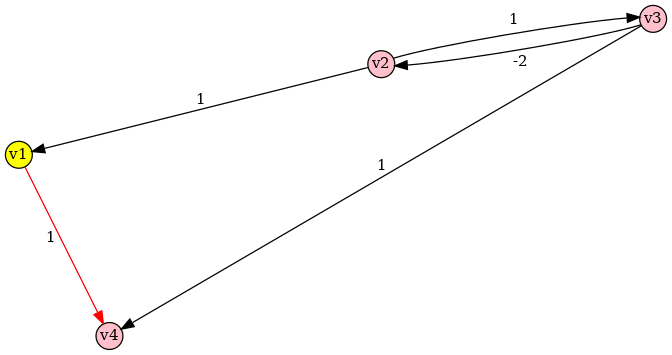

In [169]:
DSTG.graphviz_stablo_min_putova(digraf10,'v1',"D10.png",algoritam=DSTG.BellmanFord,slika=(7,6),xy=D10pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               d={('v2','v3'):10,('v3','v2'):10,('v1','v4'):8},
                               kut={('v2','v3'):-2,('v3','v2'):-2,('v1','v4'):5}) 

In [170]:
DSTG.rucni_Dijkstra_digraf(digraf10,'v1')

error: Dijkstra ne radi ispravno na negativnim tezinama


In [171]:
DSTG.Dijkstra_digraf(digraf10,'v1')

error: Dijkstra ne radi ispravno na negativnim tezinama


({'v2': inf, 'v3': inf, 'v4': 1, 'v1': 0},
 {'v2': None, 'v3': None, 'v4': 'v1', 'v1': None})

error: Dijkstra ne radi ispravno na negativnim tezinama


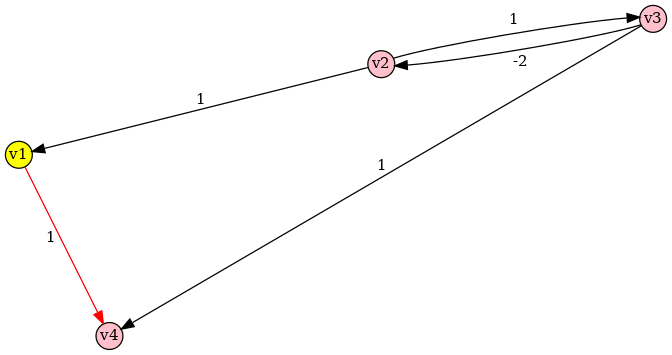

In [172]:
DSTG.graphviz_stablo_min_putova(digraf10,'v1',"D10dva.png",algoritam=DSTG.Dijkstra_digraf,slika=(7,6),xy=D10pos,
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               d={('v2','v3'):10,('v3','v2'):10,('v1','v4'):8},
                               kut={('v2','v3'):-2,('v3','v2'):-2,('v1','v4'):5}) 

algoritam <strong>Dijkstra_graf</strong> primijenjen na težinski graf

In [173]:
graf=nx.Graph([('A','B',{'weight':5}),('A','C',{'weight':2}),
                    ('A','D',{'weight':4}),('A','E',{'weight':10}),
                    ('B','D',{'weight':8}),('C','E',{'weight':7}),
                    ('C','F',{'weight':5}),('D','E',{'weight':6}),
                    ('D','G',{'weight':2}),('E','F',{'weight':3}),
                    ('E','G',{'weight':2}),('E','H',{'weight':3}),
                    ('F','H',{'weight':2}),('F','I',{'weight':4}),
                    ('G','H',{'weight':3}),('H','I',{'weight':5})])
grafPOS={'A':[-2,0],'B':[-2,2],'C':[-2,-2],'D':[0,2],'E':[0,0],
         'F':[0,-2],'G':[2,2],'H':[2,0],'I':[2,-2]}

In [174]:
DSTG.rucni_Dijkstra_graf(graf,'A',poredak=['A','B','C','D','E','F','G','H','I'])

In [175]:
DSTG.Dijkstra_graf(graf,'A')

({'B': 5, 'A': 0, 'F': 7, 'I': 11, 'D': 4, 'G': 6, 'C': 2, 'H': 9, 'E': 8},
 {'B': 'A',
  'A': None,
  'F': 'C',
  'I': 'F',
  'D': 'A',
  'G': 'D',
  'C': 'A',
  'H': 'G',
  'E': 'G'})

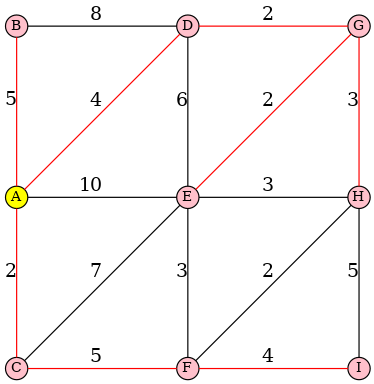

In [176]:
DSTG.graphviz_stablo_min_putova(graf,'A',"tezinski.png",algoritam=DSTG.Dijkstra_graf,xy=grafPOS,slika=(4,4),
                               vrh0="yellow",vrh1="pink",brid0="red",brid1="black",bojaTezine="black",
                               fontE=16,debljinaE=1)

## Topološko sortiranje

In [177]:
acDigraf=nx.DiGraph([(2,1),(2,4),(3,1),(3,4),(3,5),(4,5),(6,1),(6,4),(7,2),(7,3),(7,6),(7,8),(8,5),(8,6)])
acPOS={1:[0,0],2:[4,0],3:[1,-1],4:[3,-1],5:[2,-2],6:[1,1],7:[3,1],8:[2,2]}

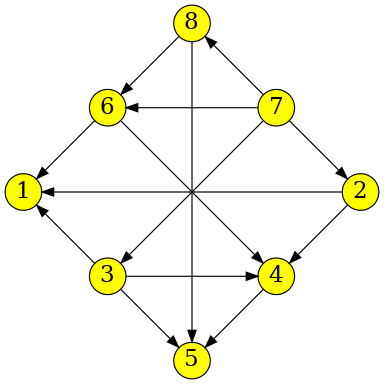

In [178]:
DSTG.crtaj_graphviz(acDigraf,"acDigraf.png",slika=(4,4),tezine=False,bojaVrha="yellow",xy=acPOS,fontV=20,debljinaE=1)

<strong>digraf jest aciklički</strong>

In [179]:
nx.is_directed_acyclic_graph(acDigraf)

True

<strong>topološki sortirani vrhovi promatranog acikličkog digrafa</strong>

In [180]:
list(nx.topological_sort(acDigraf))

[7, 8, 6, 3, 2, 4, 5, 1]

## Jaka orijentacija

In [181]:
graf2=nx.grid_2d_graph(3,3)

In [182]:
graf2=nx.relabel_nodes(graf2,dict(zip(graf2.nodes(),range(9))))

In [183]:
graf2POS={0:[0,0],1:[1,0],2:[2,0],3:[0,1],4:[1,1],5:[2,1],6:[0,2],7:[1,2],8:[2,2]}

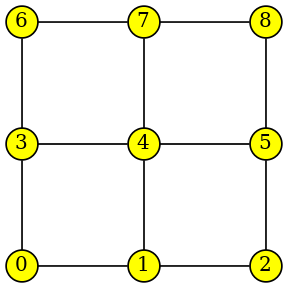

In [184]:
DSTG.crtaj_graphviz(graf2,"graf2.png",slika=(3,3),tezine=False,bojaVrha="yellow",xy=graf2POS)

<strong>jedna jaka orijentacija na promatranom grafu temeljena na DFS algoritmu iz vrha 0</strong>

In [185]:
jaki_graf2=DSTG.DFS_orijentacija(graf2,0)

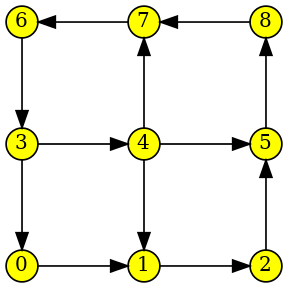

In [186]:
DSTG.crtaj_graphviz(jaki_graf2,"jaki_graf2.png",slika=(3,3),tezine=False,bojaVrha="yellow",xy=graf2POS)

<strong>jedna jaka orijentacija na kubnom grafu</strong>

In [187]:
kub=nx.cubical_graph()

In [188]:
poz_kub=nx.shell_layout(kub,[[0,1,2,3],[4,7,6,5]])

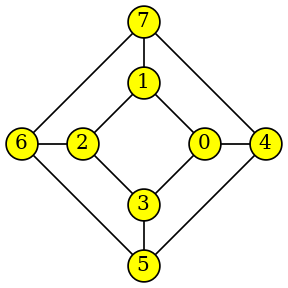

In [189]:
DSTG.crtaj_graphviz(kub,"kub.png",slika=(3,3),tezine=False,bojaVrha="yellow",xy=poz_kub,fontV=12,debljinaE=1)

In [190]:
jaki_kub=DSTG.DFS_orijentacija(kub,6)

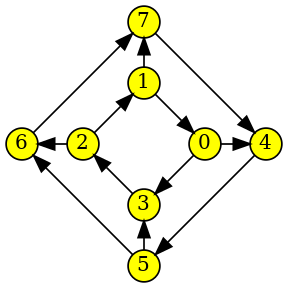

In [191]:
DSTG.crtaj_graphviz(jaki_kub,"jaki_kub.png",slika=(3,3),tezine=False,bojaVrha="yellow",xy=poz_kub,fontV=12,debljinaE=1)

## Transportne mreže

In [192]:
mreza1=nx.DiGraph([('i','u',{'weight':7}),('i','x',{'weight':2}),
                    ('u','x',{'weight':1}),('u','v',{'weight':5}),
                    ('x','y',{'weight':4}),('v','x',{'weight':3}),
                    ('v','y',{'weight':2}),('v','w',{'weight':4}),
                    ('y','z',{'weight':5}),('w','z',{'weight':3}),
                    ('w','p',{'weight':3}),('z','p',{'weight':6})])

In [193]:
mreza1_pos={'i':[0,2],'x':[2,0],'y':[6,0],'z':[10,0],'p':[12,2],'u':[2,4],'v':[6,4],'w':[10,4]}

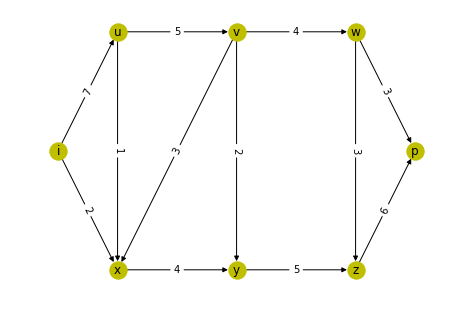

In [194]:
nx.draw(mreza1,pos=mreza1_pos,with_labels=True,node_color='y')
nx.draw_networkx_edge_labels(mreza1,pos=mreza1_pos,edge_labels=nx.get_edge_attributes(mreza1,'weight'));

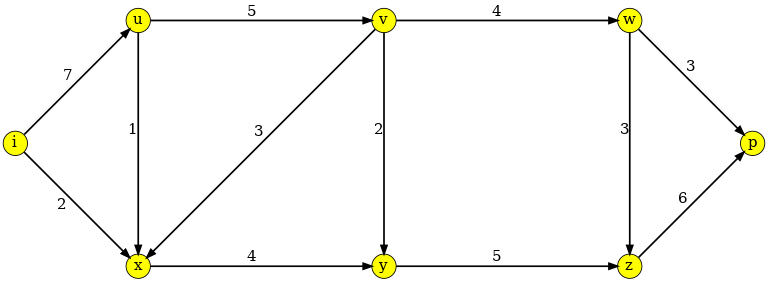

In [195]:
DSTG.crtaj_graphviz(mreza1,"mreza1.png",slika=(8,4),xy=mreza1_pos,bojaVrha="yellow",fontV=18,fontE=18,debljinaE=2,
                   d={('i','x'):10,('w','p'):10},kut={('i','x'):7,('w','p'):-7})

<strong>vrijednost maksimalnog protoka od izvora $i$ do ponora $p$</strong>

In [196]:
nx.maximum_flow_value(mreza1,'i','p',capacity='weight')

8

<strong>možemo dobiti i količinu protoka kroz pojedini luk.</strong>

In [197]:
nx.maximum_flow(mreza1,'i','p',capacity='weight')

(8,
 {'i': {'u': 6, 'x': 2},
  'u': {'x': 1, 'v': 5},
  'x': {'y': 3},
  'v': {'x': 0, 'y': 1, 'w': 4},
  'y': {'z': 4},
  'w': {'z': 1, 'p': 3},
  'z': {'p': 5},
  'p': {}})

<strong>možemo dobiti potrebne informacije u obliku tablice</strong>

In [198]:
DSTG.maksimalni_protok(mreza1,'i','p')

Vrijednost maksimalnog protoka:  8


<strong>možemo općenito tražiti vrijednost maksimalnog protoka između bilo koja dva vrha koja nisu nužno izvor i ponor</strong>

In [199]:
nx.maximum_flow_value(mreza1,'i','v',capacity='weight')

5

In [200]:
DSTG.maksimalni_protok(mreza1,'i','v')

Vrijednost maksimalnog protoka:  5


In [201]:
nx.maximum_flow_value(mreza1,'u','z',capacity='weight')

6

In [202]:
DSTG.maksimalni_protok(mreza1,'u','z')

Vrijednost maksimalnog protoka:  6


<strong>od vrha $z$ do vrha $u$ ne postoji protok</strong>

In [203]:
nx.maximum_flow_value(mreza1,'z','u',capacity='weight')

0

In [204]:
DSTG.maksimalni_protok(mreza1,'z','u')

Vrijednost maksimalnog protoka:  0


<strong>minimalni $(i,p)$-rez</strong>

vrijednost minimalnog reza i particija vrhova

In [205]:
nx.minimum_cut(mreza1,'i','p',capacity='weight')

(8, ({'i', 'u'}, {'p', 'v', 'w', 'x', 'y', 'z'}))

bridovi minimalnog reza i pripadna particija vrhova

In [206]:
DSTG.minimalni_rez(mreza1,'i','p')

{'particija': ({'i', 'u'}, {'p', 'v', 'w', 'x', 'y', 'z'}),
 'bridovi': [('i', 'x'), ('u', 'v'), ('u', 'x')]}

minimalni rez istaknut na digrafu

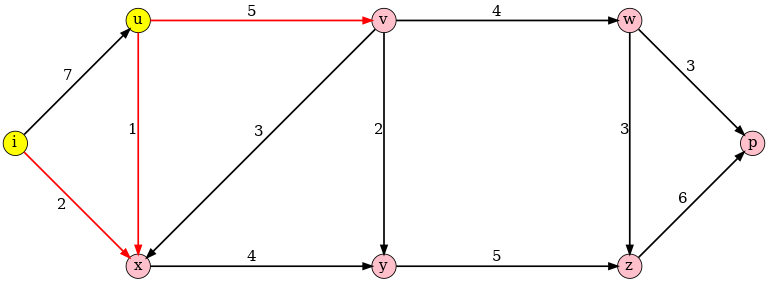

In [207]:
DSTG.graphviz_minimalni_rez(mreza1,'i','p',"mreza1.png",slika=(8,4),xy=mreza1_pos,vrh0="yellow",
                           vrh1="pink",brid0="red",brid1="black",fontV=18,fontE=18,debljinaE=2,
                           d={('i','x'):10,('w','p'):10},kut={('i','x'):7,('w','p'):-7})

<strong>minimalni $(u,z)$-rez</strong>

In [208]:
nx.minimum_cut(mreza1,'u','z',capacity='weight')

(6, ({'p', 'u'}, {'i', 'v', 'w', 'x', 'y', 'z'}))

In [209]:
DSTG.minimalni_rez(mreza1,'u','z')

{'particija': ({'p', 'u'}, {'i', 'v', 'w', 'x', 'y', 'z'}),
 'bridovi': [('u', 'v'), ('u', 'x')]}

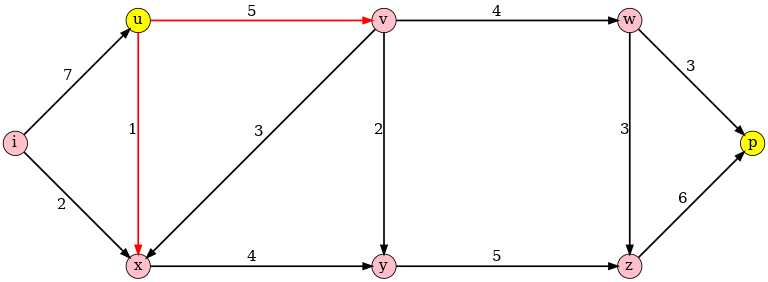

In [210]:
DSTG.graphviz_minimalni_rez(mreza1,'u','z',"mreza1dva.png",slika=(8,4),xy=mreza1_pos,vrh0="yellow",
                           vrh1="pink",brid0="red",brid1="black",fontV=18,fontE=18,debljinaE=2,
                           d={('i','x'):10,('w','p'):10},kut={('i','x'):7,('w','p'):-7})

<strong>još jedan primjer s drugom transportnom mrežom</strong>

In [211]:
mreza2=nx.DiGraph([('i','A',{'weight':3}),('i','C',{'weight':2}),
                    ('i','E',{'weight':6}),('A','B',{'weight':4}),
                    ('C','D',{'weight':2}),('D','p',{'weight':4}),
                    ('E','F',{'weight':2}),('E','H',{'weight':2}),
                    ('F','B',{'weight':2}),('F','G',{'weight':1}),
                    ('G','p',{'weight':5}),('H','D',{'weight':4}),
                    ('H','G',{'weight':1}),('B','p',{'weight':6})])

In [212]:
mreza2_pos={'i':[0,2],'A':[1,4],'B':[3.5,4],'C':[1,0],'D':[3.5,0],'E':[1.2,2],
            'F':[2.25,3.25],'G':[3.5,2],'H':[2.25,1.3],'p':[5,2]}

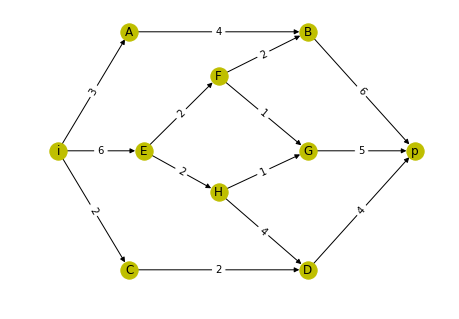

In [213]:
nx.draw(mreza2,pos=mreza2_pos,with_labels=True,node_color='y')
nx.draw_networkx_edge_labels(mreza2,pos=mreza2_pos,edge_labels=nx.get_edge_attributes(mreza2,'weight'));

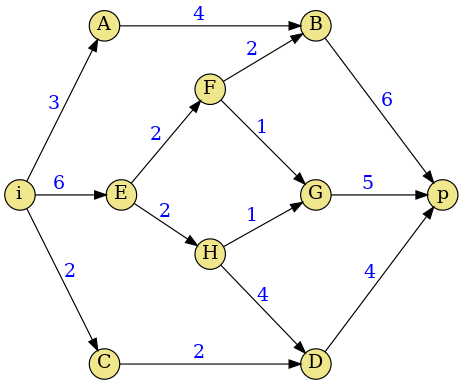

In [214]:
DSTG.crtaj_graphviz(mreza2,"mreza2.png",slika=(6,4),xy=mreza2_pos,bojaVrha="khaki",bojaBrida="black",
                   bojaTezine="blue",fontV=16,fontE=16,debljinaE=1,
                    d={('i','C'):7,('B','p'):8,('H','D'):6,('F','G'):6,('E','H'):4},
                    kut={('i','C'):-7,('B','p'):-7,('H','D'):-7,('F','G'):-7,('E','H'):-12})

<strong>vrijednost maksimalnog protoka od izvora do ponora</strong>

In [215]:
nx.maximum_flow_value(mreza2,'i','p',capacity='weight')

9

<strong>količina protoka kroz pojedine lukove</strong>

In [216]:
DSTG.maksimalni_protok(mreza2,'i','p')

Vrijednost maksimalnog protoka:  9


<strong>minimalni $(i,p)$-rez i particija vrhova</strong>

In [217]:
nx.minimum_cut(mreza2,'i','p',capacity='weight')

(9, ({'C', 'E', 'i'}, {'A', 'B', 'D', 'F', 'G', 'H', 'p'}))

In [218]:
DSTG.minimalni_rez(mreza2,'i','p')

{'particija': ({'C', 'E', 'i'}, {'A', 'B', 'D', 'F', 'G', 'H', 'p'}),
 'bridovi': [('i', 'A'), ('C', 'D'), ('E', 'F'), ('E', 'H')]}

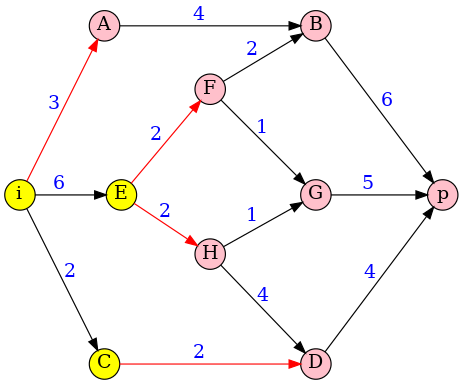

In [219]:
DSTG.graphviz_minimalni_rez(mreza2,'i','p',"mreza2_rez.png",slika=(6,4),xy=mreza2_pos,bojaTezine="blue",
                           fontV=16,fontE=16,debljinaE=1,
                            d={('i','C'):7,('B','p'):8,('H','D'):6,('F','G'):6,('E','H'):4},
                            kut={('i','C'):-7,('B','p'):-7,('H','D'):-7,('F','G'):-7,('E','H'):-12})